---
title: Unsupervised Learning Part 2
author: Juma Shafara
date: "2024-02"
date-modified: "2024-07-25"
description: Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. 
keywords: [Introduction to Unsupervised Learning, Clustering, DBSCAN]
---

![Photo by DATAIDEA](../../assets/banner4.png)

In the previous section, we looked clustering and KMeans as model for cluster analysis. In this section, we will look at more clustering algorithms and Dimensionality reduction.

- Clustering algorithms: Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)


Let's install the required libraries.

In [ ]:
# # uncomment and run this cell to install the packages and libraries
# !pip install dataidea

## Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

## Clustering 

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html


Here is a visual representation of clustering:

<img src="https://i.imgur.com/VXPgw6H.png" width="100%">



Here are some real-world applications of clustering:

<ul class="cursored-list">
<li><i class="bi bi-cursor"></i> Customer segmentation</li> 
<li><i class="bi bi-cursor"></i> Product recommendation</li> 
<li><i class="bi bi-cursor"></i> Feature engineering</li> 
<li><i class="bi bi-cursor"></i> Anomaly/fraud detection</li> 
<li><i class="bi bi-cursor"></i> Taxonomy creation</li> 
</ul>


We'll use the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to study some of the clustering algorithms available in `scikit-learn`. It contains various measurements for 150 flowers belonging to 3 different species.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sns.set_style('darkgrid')
%matplotlib inline

Let's load the popular iris and penguin datasets. These datasets are already built in seaborn

In [ ]:
# load the iris dataset
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# load the penguin dataset
sns.get_dataset_names()
ping_df = sns.load_dataset('penguins')
ping_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


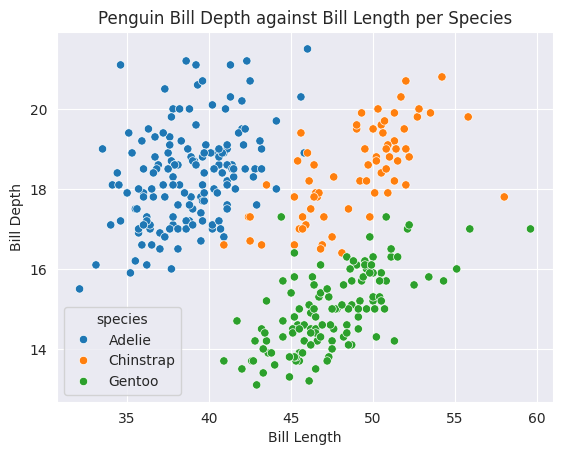

In [ ]:
sns.scatterplot(data=ping_df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Penguin Bill Depth against Bill Length per Species')
plt.ylabel('Bill Depth')
plt.xlabel('Bill Length')
plt.show()

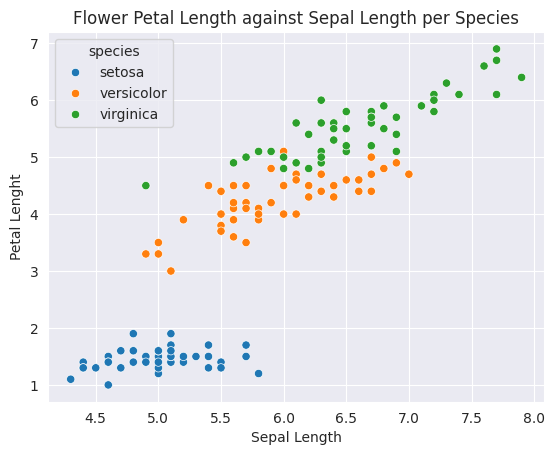

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species')
plt.title('Flower Petal Length against Sepal Length per Species')
plt.ylabel('Petal Lenght')
plt.xlabel('Sepal Length')
plt.show()

We'll attempt to cluster observations using numeric columns in the data. 

In [ ]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = iris_df[numeric_cols]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png" width="400">

Here's a video explaining how the DBSCAN algorithm works: https://www.youtube.com/watch?v=C3r7tGRe2eI


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
model = DBSCAN(eps=1.1, min_samples=4)
model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In DBSCAN, there's no prediction step. It directly assigns labels to all the inputs.

In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

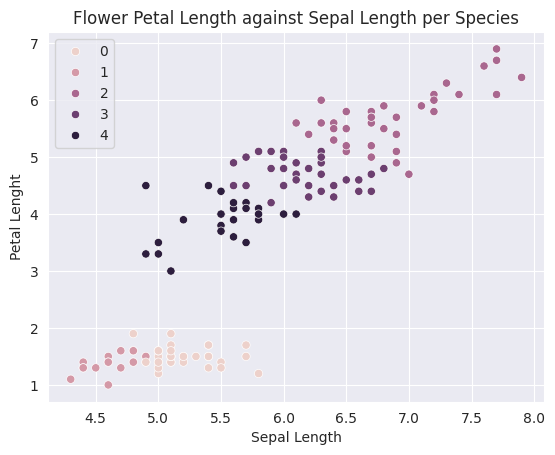

In [ ]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_)
plt.title('Flower Petal Length against Sepal Length per Species')
plt.ylabel('Petal Lenght')
plt.xlabel('Sepal Length')
plt.show()

<!-- Alert -->
<div class="alert text-white rounded"><h4><i class="bi bi-info-circle-fill"></i> EXERCISE</h4><p>Try changing the values of `eps` and `min_samples` and observe how the number of clusters the classification changes..</p></div>

Here's how the results of DBSCAN and K Means differ:

<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png" width="640">

### Hierarchical Clustering

Hierarchical clustering, as the name suggests, creates a hierarchy or a tree of clusters.

<img src="https://dashee87.github.io/images/hierarch.gif" width="640">

While there are several approaches to hierarchical clustering, the most common approach works as follows:

1. Mark each point in the dataset as a cluster.
2. Pick the two closest cluster centers without a parent and combine them into a new cluster. 
3. The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
3. Repeat steps 2 and 3 till there's just one cluster left.

Watch this video for a visual explanation of hierarchical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo

<!-- Alert -->
<div class="alert text-white rounded"><h4><i class="bi bi-info-circle-fill"></i> EXERCISE</h4><p>Implement hierarchical clustering for the Iris dataset using `scikit-learn`</p></div>

There are several other clustering algorithms in Scikit-learn. You can learn more about them and when to use them here: https://scikit-learn.org/stable/modules/clustering.html

Let's save our work before continuing.

## Dimensionality Reduction and Manifold Learning

In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number. 


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions


### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works:

<div class="video-wrapper">
  <iframe
    class="video-iframe"
    src="https://www.youtube.com/embed/FgakZw6K1QQ?si=GMxGYvSbWQJmoYTa"
    title="YouTube video player"
    frameborder="0"
    allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture;"
    allowfullscreen
  >
  </iframe>
</div>

Here's an example of PCA to reduce 2D data to 1D:

Let's apply Principal Component Analysis to the Iris dataset.

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
86,6.7,3.1,4.7,1.5,versicolor
27,5.2,3.5,1.5,0.2,setosa
146,6.3,2.5,5.0,1.9,virginica
85,6.0,3.4,4.5,1.6,versicolor
30,4.8,3.1,1.6,0.2,setosa


In [ ]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(iris_df[numeric_cols])

PCA(n_components=2)

In [ ]:
transformed = pca.transform(iris_df[numeric_cols])

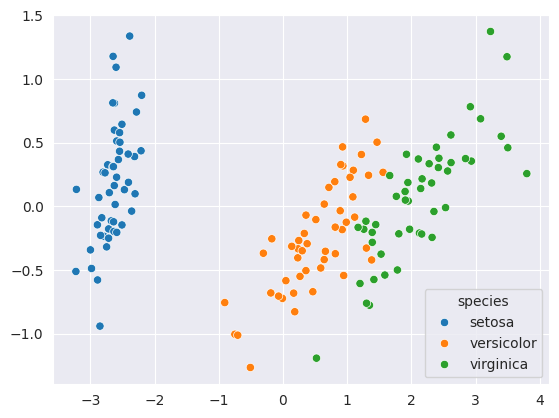

In [ ]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])

As you can see, the PCA algorithm has done a very good job of separating different species of flowers using just 2 measures.

> **EXERCISE**: Apply Principal Component Analysis to a large high-dimensional dataset and train a machine learning model using the low-dimensional results. Observe the changes in the loss and training time for different numbers of target dimensions.

Learn more about Principal Component Analysis here: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions. 

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">

Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(iris_df[numeric_cols])

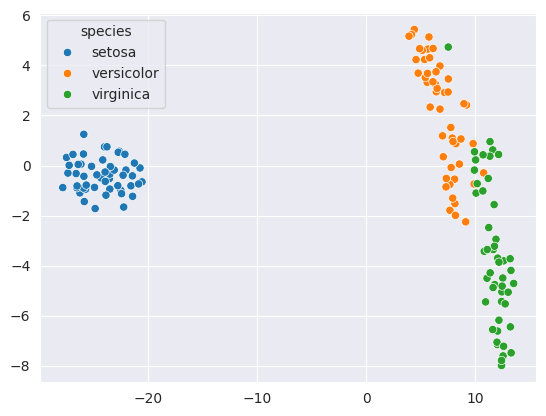

In [ ]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

As you can see, the flowers from the same species are clustered very closely together. The relative distance between the species is also conveyed by the gaps between the clusters.

> **EXERCISE**: Use t-SNE to visualize the [MNIST handwritten digits dataset](https://www.kaggle.com/oddrationale/mnist-in-csv).

## Summary and References

<img src="https://i.imgur.com/VbVFAsg.png" width="100%">

The following topics were covered in this tutorial:

<ul class="cursored-list">
<li><i class="bi bi-cursor"></i> Overview of unsupervised learning algorithms in Scikit-learn</li> 
<li><i class="bi bi-cursor"></i> Clustering algorithms: DBScan, Hierarchical clustering etc.</li> 
<li><i class="bi bi-cursor"></i> Dimensionality reduction (PCA) and manifold learning (t-SNE)</li> 
</ul>

Check out these resources to learn more:

- [https://www.coursera.org/learn/machine-learning](https://www.coursera.org/learn/machine-learning)
- [https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)
- [https://scikit-learn.org/stable/unsupervised_learning.html](https://scikit-learn.org/stable/unsupervised_learning.html)
- [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html)